In [1]:
#Assalomu alaykum, In this project, I am about to investigate and build a model which detect Autism
#The data is taken from kaggle platform

In [2]:
#Firstly, we import all needfull libraries and models that we use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("Autism_Data.arff")

In [4]:
#So we see there is no null values, but when we take a look at the data, there are some bags and outliers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


In [6]:
for column in list(data.columns):
    if data[column].dtype is data['gender'].dtype:
        print(f"{column} \n {data[column].value_counts()} \n\n")
    else:
        print(False)

False
False
False
False
False
False
False
False
False
False
age 
 21     49
20     46
23     37
22     37
19     35
24     34
27     31
18     31
30     30
26     28
25     27
29     27
28     24
31     21
17     18
32     18
35     17
37     17
33     16
40     16
42     15
36     13
38     12
34     12
43     11
44     10
47      8
39      7
55      6
53      6
46      6
50      5
52      5
48      4
45      4
49      3
41      3
54      2
58      2
?       2
56      2
61      2
59      1
64      1
60      1
383     1
51      1
Name: age, dtype: int64 


gender 
 m    367
f    337
Name: gender, dtype: int64 


ethnicity 
 White-European       233
Asian                123
?                     95
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64 


jundice 
 no     635
yes     69
Nam

In [7]:
data=data.replace({"?":None})

In [8]:
#some columns converted to numberic values 
data['gender']=data['gender'].replace({"m":1,'f':0})

In [9]:
data[['Class/ASD','used_app_before','austim','jundice']]=data[
    ['Class/ASD','used_app_before','austim','jundice']].apply(lambda x: x.astype(str).str.lower()).replace({"yes":1,'no':0})

In [10]:
#Here some contries have quotes inluced at the start and the end, we get rid of them below
data['contry_of_res'].value_counts()

'United States'           113
'United Arab Emirates'     82
'New Zealand'              81
India                      81
'United Kingdom'           77
                         ... 
China                       1
Chile                       1
Lebanon                     1
Burundi                     1
Cyprus                      1
Name: contry_of_res, Length: 67, dtype: int64

In [11]:
for ind, val in data['contry_of_res'].value_counts().items():
    data['contry_of_res']=data['contry_of_res'].replace({"{n}".format(n=ind):ind.strip("\'")})

In [12]:
for index, val in data['ethnicity'].value_counts().items():
    data['ethnicity']=data['ethnicity'].replace({"{n}".format(n=index): index.strip("\'")})
    

for index, val in data['relation'].value_counts().items():
    data['relation']=data['relation'].replace({"{n}".format(n=index): index.strip("\'")})

In [13]:
data['relation'][data['relation'].isnull()]='Others'
data['ethnicity'][data['ethnicity'].isnull()]='Others'

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              702 non-null    object
 11  gender           704 non-null    int64 
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    int64 
 14  austim           704 non-null    int64 
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    int64 
 17  result           704 non-null    in

In [15]:
#We don't need this column because every value is the same
data=data.drop('age_desc',axis=1)

In [16]:
#we get rid of the these null values

data['age'][data['age'].isnull()]

data=data.drop([62,91])
data=data.reset_index()

In [17]:
data['Class/ASD'].value_counts()

0    513
1    189
Name: Class/ASD, dtype: int64

In [18]:
data['A1_Score'].value_counts()

1    508
0    194
Name: A1_Score, dtype: int64

In [19]:
Score_df=data.loc[:,'A1_Score':'A10_Score']

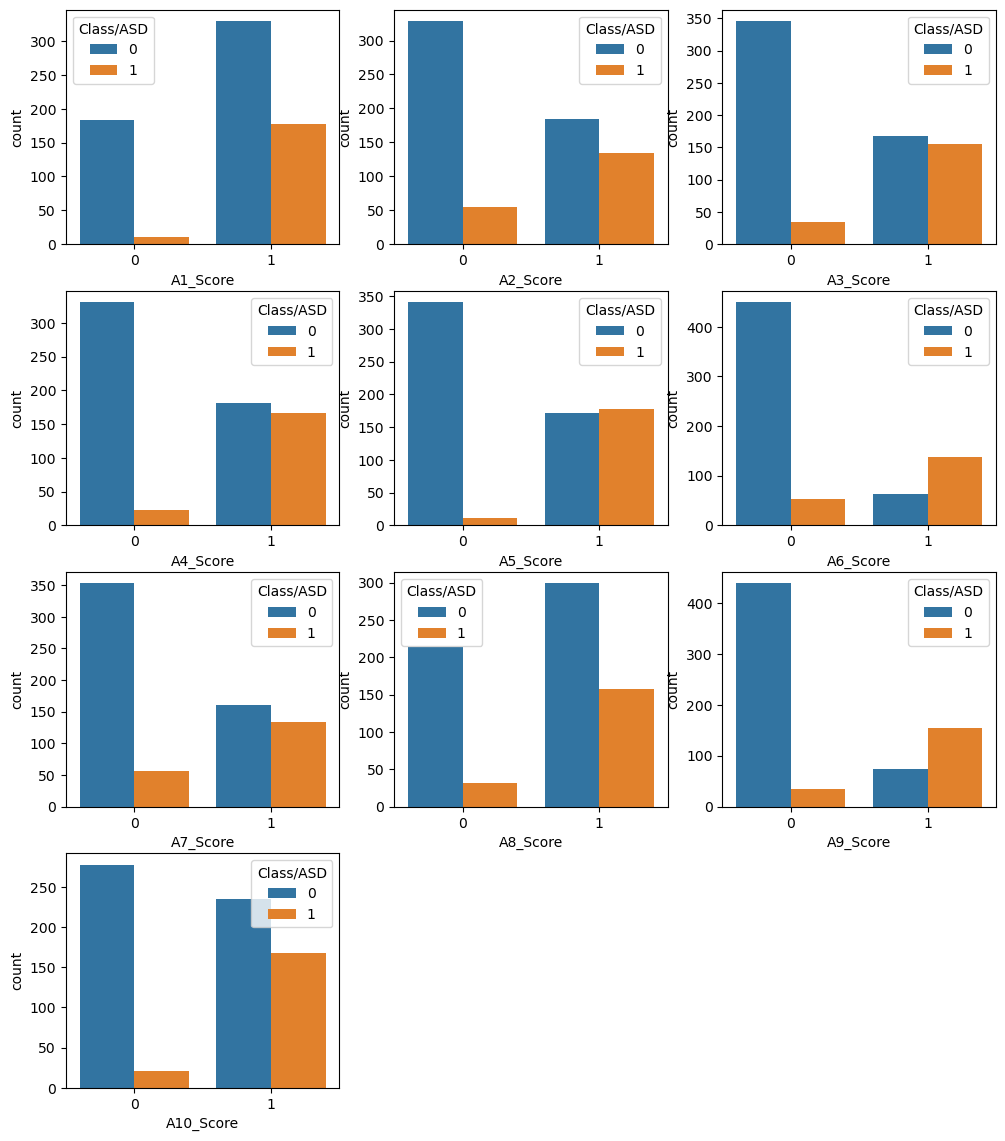

In [20]:
plt.subplots(figsize=(12,14))

for i, col in enumerate(Score_df.columns):
    plt.subplot(4,3, i+1)
    sns.countplot(x=data[col],hue=data['Class/ASD'])


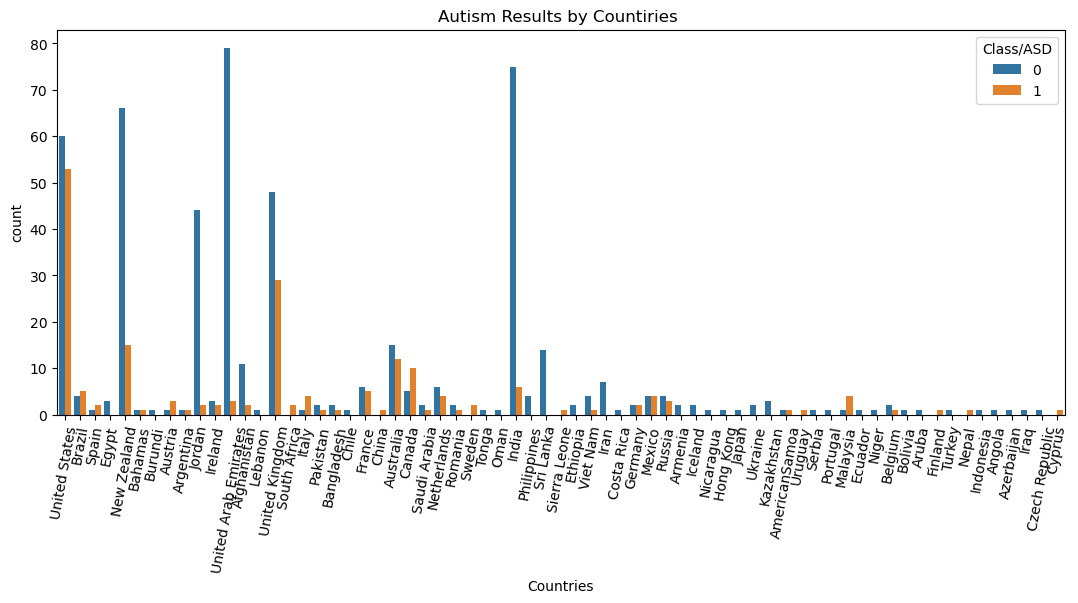

In [21]:
plt.subplots(figsize=(13,5))
sns.countplot(data=data, x=data['contry_of_res'], hue=data['Class/ASD'])
plt.xticks(rotation=80)
plt.xlabel("Countries")
plt.title("Autism Results by Countiries ")
plt.show()

In [22]:
df_class1=data[data['Class/ASD']==1]
df_class0=data[data['Class/ASD']==0]

In [23]:
class0_10=df_class0['contry_of_res'].value_counts()[:10]
class1_10=df_class1['contry_of_res'].value_counts()[:10]

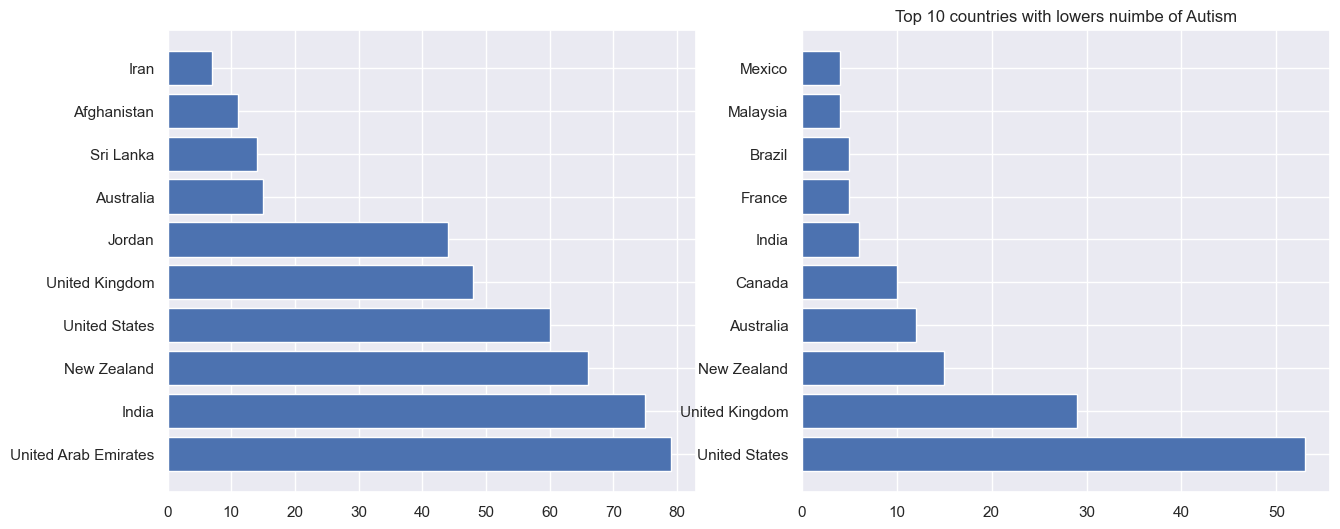

In [24]:
sns.set_theme()

fig, ax=plt.subplots(1,2, figsize=(15,6))

ax[0].barh(class0_10.index, class0_10.values)
plt.title("Top 10 countries with highest number of Autism")
ax[1].barh(class1_10.index, class1_10.values)
plt.title("Top 10 countries with lowers nuimbe of Autism")

plt.show()

In [25]:
data['age']=data['age'].astype(int)

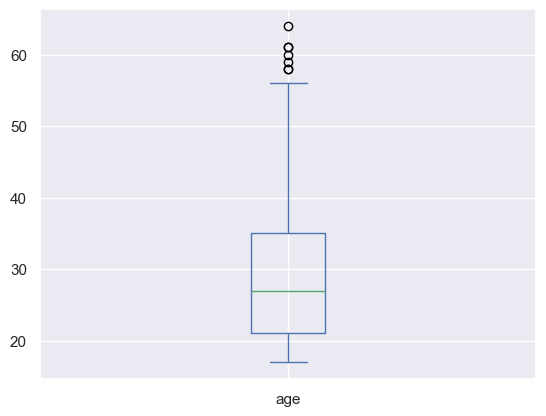

In [28]:
#There are some Outliers in out age column, let's get rid of it below
data['age'].plot.box()
plt.show()

In [29]:
data=data.drop(data[data['age']>=51].index)

In [30]:
data=data.reset_index(drop=True)

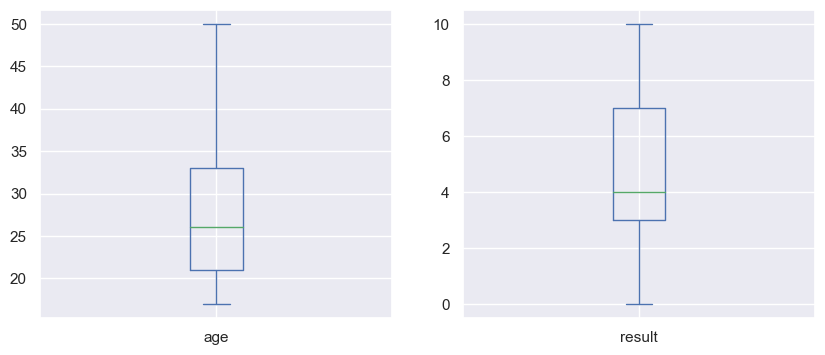

In [48]:
plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)
data['age'].plot.box()
plt.subplot(1,2,2)
data['result'].plot.box()
plt.show()

In [32]:
#Let's group age to see the pattern 
def age_convert(age):
    if age<4:
        return 'Toddler'
    elif age<6:
        return 'Pre-school child'
    elif age<13:
        return 'School age child'
    elif age<19:
        return 'Adolescent'
    elif age<41:
        return 'Young adult'
    elif age<66:
        return 'Middle age adult'
    else:
        return 'Older adult'

In [33]:
data['age_grouped']=data['age'].apply(age_convert)

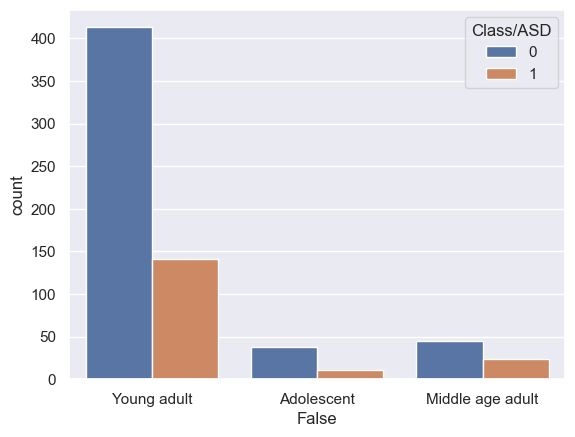

In [34]:
#We can conlude that Young adults are not mostly suffered with Autism 
sns.countplot(data=data,x='age_grouped', hue='Class/ASD')
plt.xlabel(False)
plt.show()

In [35]:
#how is the correlation , let's see
data.corrwith(data['Class/ASD']).sort_values(ascending=False)

Class/ASD          1.000000
result             0.818994
A9_Score           0.624440
A6_Score           0.572457
A5_Score           0.527992
A4_Score           0.466043
A3_Score           0.444593
A10_Score          0.382687
A7_Score           0.345861
A2_Score           0.310463
A1_Score           0.286808
A8_Score           0.242620
austim             0.166929
age                0.105595
jundice            0.091331
level_0            0.048773
index              0.048594
used_app_before    0.047463
gender            -0.082249
dtype: float64

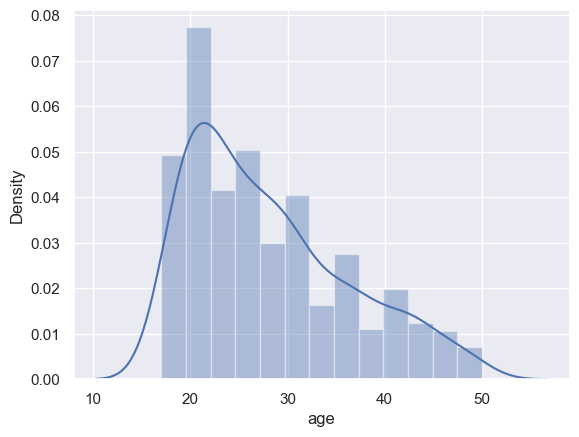

In [36]:
#Age pattern, most of them are in their adultery period
sns.distplot(data['age'])
plt.show()

In [37]:
#Saving object and integer columns in separate list
objects=[col for col in data.columns if data[col].dtype=='object']
ints=[col for col in data.columns if data[col].dtype==int]

In [38]:
data['ethnicity']=data['ethnicity'].replace({'Other':'Others',"others":'Others'})

In [39]:
#Encoding objects columns

def label_encoder(data):
    for col in objects:
        data[col]=LabelEncoder().fit_transform(data[col])
    return data

data=label_encoder(data)

In [40]:
data.corrwith(data['Class/ASD']).sort_values()

gender            -0.082249
age_grouped       -0.013275
contry_of_res     -0.007104
used_app_before    0.047463
index              0.048594
level_0            0.048773
jundice            0.091331
age                0.105595
relation           0.141549
austim             0.166929
ethnicity          0.204399
A8_Score           0.242620
A1_Score           0.286808
A2_Score           0.310463
A7_Score           0.345861
A10_Score          0.382687
A3_Score           0.444593
A4_Score           0.466043
A5_Score           0.527992
A6_Score           0.572457
A9_Score           0.624440
result             0.818994
Class/ASD          1.000000
dtype: float64

In [41]:
data_ready=data.drop(['gender','age_grouped','contry_of_res','jundice'], axis=1)

### Time to build our model, I got five diffirent models to see which execute with higher accuracy

In [42]:
training_data=data_ready.drop('Class/ASD', axis=1)
training_label=data_ready[['Class/ASD']]

In [43]:
X_train,X_test, Y_train,Y_test=train_test_split(training_data, training_label, test_size=0.2, random_state=42)

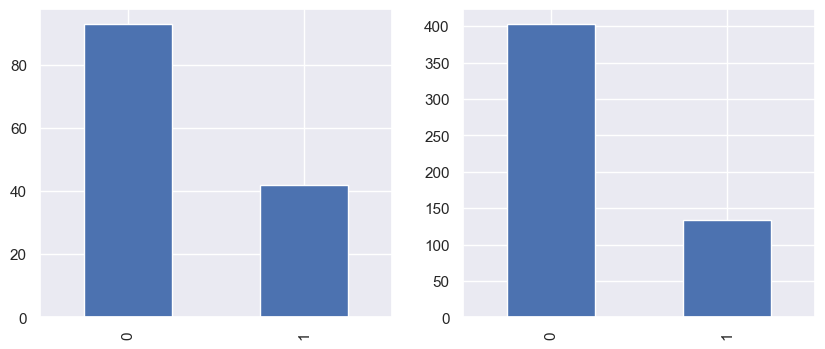

In [44]:
plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)
Y_test['Class/ASD'].value_counts().plot.bar()
plt.subplot(1,2,2)
Y_train['Class/ASD'].value_counts().plot.bar()
plt.show()

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVC() : 
Training Accuracy :  1.0
Validation Accuracy :  0.9642857142857143


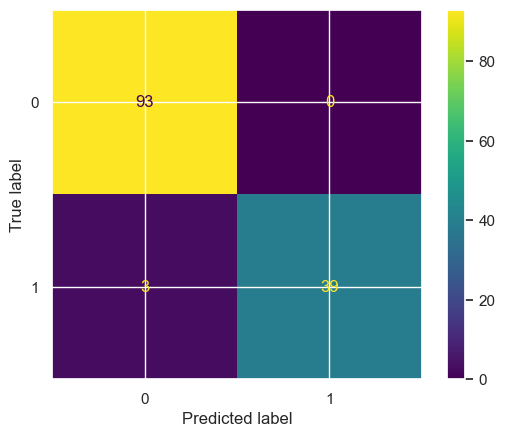

LogisticRegression() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0


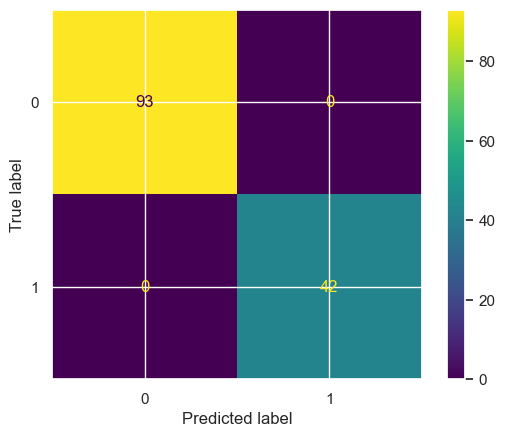

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0


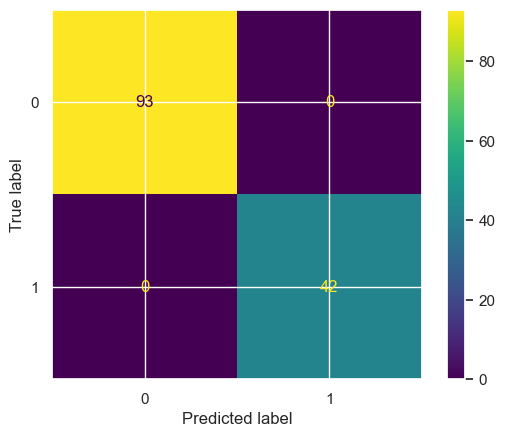

RandomForestClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0


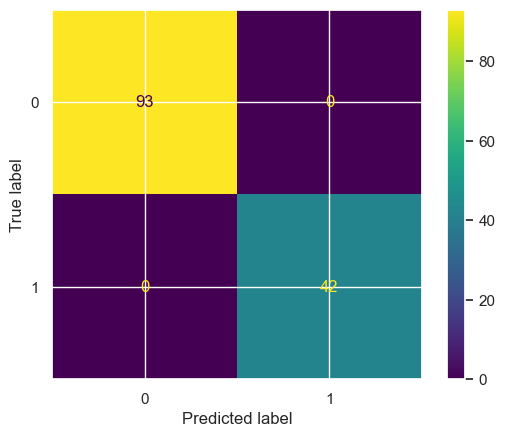

DecisionTreeClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0


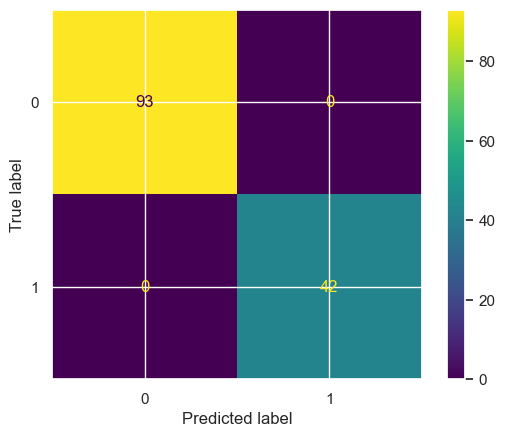

In [46]:
models=[SVC(),LogisticRegression(), XGBClassifier(),RandomForestClassifier(), DecisionTreeClassifier()]

for model in models:
    
    model.fit(X_train, Y_train)
    prediction_train=model.predict(X_train)
    prediction=model.predict(X_test)
    
    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, prediction_train))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_test, prediction))
    cm=metrics.confusion_matrix(Y_test, prediction, labels=model.classes_)
    disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

## We see that all models except Support Vector Machine Classifier perform with the higest accuracy 